In [2]:
# import and set options
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import re
import utils

## Consistency curve

First read in the consistency results for various threshold depths.

In [40]:
# read in consistency results
df = pd.read_table('example_data/consistency_curve.txt', index_col=0)

We next plotted the consistency across multiple depths in the prioritized gene list produced by each method.

In [46]:
def consistency_curve(df, depths,
                      color_pal_dict,
                      xlab='',
                      ylab='',
                      sem_mult=1):
    """Makes errorbar plots for various consistency metrics."""
    with sns.plotting_context('talk', font_scale=1.5), sns.axes_style('ticks'):
        # figure out the means vs sem columns
        mean_cols = ['TopDrop {0} overlap mean'.format(x) for x in depths]
        sem_cols = ['TopDrop {0} overlap sem'.format(x) for x in depths]
        mean_df = df[mean_cols].copy()
        sem_df = df[sem_cols].copy()

        # make figure
        fig, ax = plt.subplots(1, 1, sharey=True)
        
        # plot each method
        for method, row in mean_df.iterrows():
            ax.plot(depths, mean_df.loc[method, :],
                    color=color_pal_dict[method], label=method)
            ax.errorbar(depths, mean_df.loc[method, :], 
                        yerr=sem_mult*sem_df.loc[method, :],
                        fmt=None, ecolor='black', elinewidth=4, label='')
            
        # format plot
        ax.legend(loc='upper right', bbox_to_anchor=(1.6, .85), title='Methods')
        ax.set_xlabel(xlab)
        ax.set_ylabel(ylab)
        plt.tight_layout()
        fig.set_size_inches(7,7)
        sns.despine()

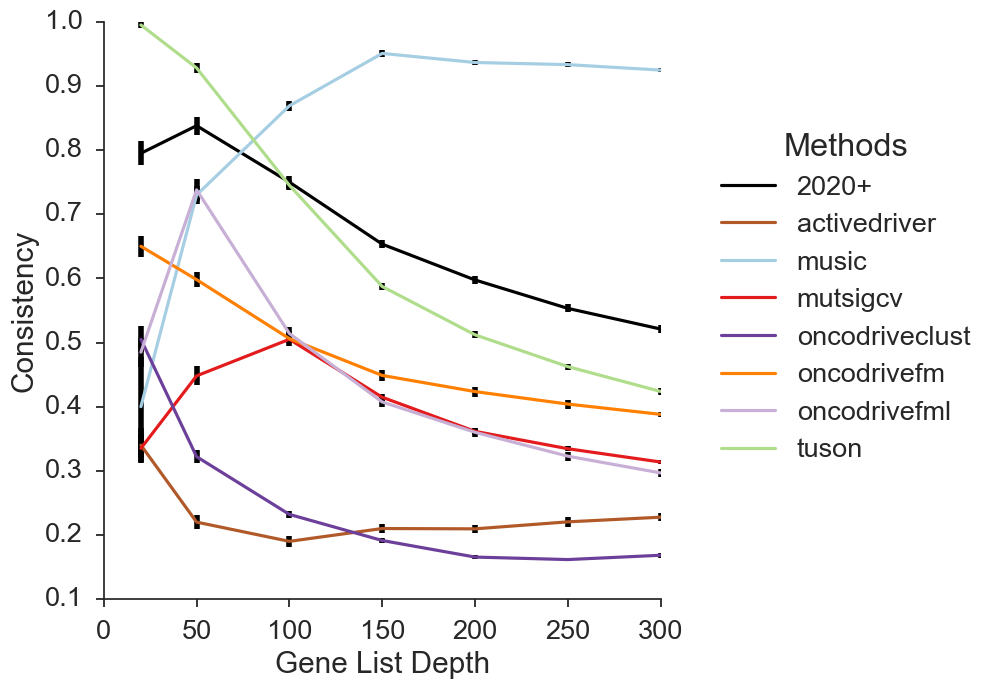

In [47]:
# colors
paired_pal = sns.color_palette("Paired", 14)
colors = {
    '2020+': 'black',
    'tuson': paired_pal[2],
    'mutsigcv': paired_pal[5],
    'oncodrivefm': paired_pal[7],
    'oncodrivefml': paired_pal[8],
    'oncodriveclust': paired_pal[9],
    'activedriver': paired_pal[11],
    'music': paired_pal[12],
}

# plot consistency curve
with sns.plotting_context('paper'):
    depths = [20, 50, 100, 150, 200, 250, 300]
    leg = consistency_curve(full_df, depths, color_pal_dict=colors,
                            xlab='Gene List Depth', ylab='Consistency')
    plt.tight_layout()